## Topic Modelling

#### Prerequistes

In [1]:
import nltk
#nltk.download('stopwords') - 1 time

C:\Users\Chinmay\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Chinmay\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Chinmay\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
#Use below method to install spacy otherwise there is high chances it will not detect on notebook
# https://stackoverflow.com/questions/43979042/install-spacy-not-working-in-jupyter-notebook

# 1 -Time
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.18.5 which is incompatible.
tensorflow 2.5.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
gensim 3.8.3 requires Cython==0.29.14, but you have cython 0.29.28 which is incompatible.


  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached wasabi-0.9.0-py3-none-any.whl (25 kB)
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Using cached catalogue-2.0.7-py3-none-any.whl (17 kB)
  Using cached spacy_legacy-3.0.9-py2.py3-none-any.whl (20 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: smart-open
    Found existing installation: smart-open 3.0.0
    Uninstalling smart-open-3.0.0:
      Successfully uninstalled smart-open-3.0.0


2022-03-26 16:26:02.200622: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-26 16:26:02.231488: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Install the spacy module - 1 time
#!pip install -U spacy
!python -m spacy validate


| Loading compatibility table...
/ Loading compatibility table...
- Loading compatibility table...
\ Loading compatibility table...
| Loading compatibility table...
/ Loading compatibility table...
- Loading compatibility table...
\ Loading compatibility table...
| Loading compatibility table...
/ Loading compatibility table...
- Loading compatibility table...
[+] Loaded compatibility table

================= Installed pipeline packages (spaCy v3.2.3) =================
[i] spaCy installation:
E:\myWorks\Python\passwordManager\pwdmngr\topicmodeling\lib\site-packages\spacy

NAME             SPACY            VERSION      
en_core_web_sm   >=3.2.0,<3.3.0   3.2.0     [+]



In [3]:
# Download the english language module- 1 time
#!python -m spacy download en

In [5]:
#import sys
#!{sys.executable} -m pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached Cython-0.29.14-cp37-cp37m-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.28
    Uninstalling Cython-0.29.28:
      Successfully uninstalled Cython-0.29.28


#### Importing packages


In [7]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#### Prepraing stopwords

In [8]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

#### Import Newsgroups Data

We will be using the 20-Newsgroups dataset for this exercise. This version of the dataset contains about 11k newsgroups posts from 20 different topics.  

https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json

In [9]:
# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


#### Remove emails and newline characters

In [10]:
df['content'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [12]:
# We need to remove these emails, \n and othere sympbols from the content
#Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: '
 'rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: '
 '15 I was wondering if anyone out there could enlighten me on this car I saw '
 'the other day. It was a 2-door sports car, looked to be from the late 60s/ '
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition, the front bumper was separate from the rest of the body. This is '
 'all I know. If anyone can tellme a model name, engine specs, years of '
 'production, where this car is made, history, or whatever info you have on '
 'this funky looking car, please e-mail. Thanks, - IL ---- brought to you by '
 'your neighborhood Lerxst ---- ']


#### Word tokenisation and text cleanup

Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether. gensim's simple_preprocess() is great for this task.

In [13]:
# deacc=True removes punctuations
def word_tokenisation(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  

data_words = list(word_tokenisation(data))

print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


#### Creating bigram and trigram models

genesim's phrases is best for this. It has two important parameters.

min_count = Higher the value, harder it will be words to get combined

Threshold = Higher threshold fewer phrases

In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd_edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


In [15]:
print(bigram_mod[data_words[0]])

['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting', 'host', 'rac_wam', 'umd_edu', 'organization', 'university', 'of', 'maryland_college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


#### stopwords removal, Bigram generation & word lemmetization

In [16]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [19]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [20]:
data_words_nostops[0] #List contaings words belongs to senetnce1 of the content after removing stopwords

['wheres',
 'thing',
 'car',
 'nntp',
 'posting',
 'host',
 'rac',
 'wam',
 'umd',
 'organization',
 'university',
 'maryland',
 'college',
 'park',
 'lines',
 'wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 'door',
 'sports',
 'car',
 'looked',
 'late',
 'early',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'mail',
 'thanks',
 'il',
 'brought',
 'neighborhood',
 'lerxst']

In [21]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [22]:
data_words_bigrams[0] ##List contaings bigram words belongs to senetnce1 of the content

['wheres',
 'thing',
 'car',
 'nntp_posting',
 'host',
 'rac_wam',
 'umd',
 'organization',
 'university',
 'maryland_college',
 'park',
 'lines',
 'wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 'door',
 'sports',
 'car',
 'looked',
 'late',
 'early',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front_bumper',
 'separate',
 'rest',
 'body',
 'know',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'mail',
 'thanks',
 'il',
 'brought',
 'neighborhood',
 'lerxst']

In [24]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [25]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [26]:
data_lemmatized[0] #List contains leematised words belongs to the 1st document of content

['thing',
 'car',
 'nntp_poste',
 'host',
 'rac_wam',
 'park',
 'line',
 'wonder',
 'enlighten',
 'car',
 'see',
 'day',
 'door',
 'sport',
 'car',
 'look',
 'late',
 'early',
 'call',
 'door',
 'really',
 'small',
 'addition',
 'front_bumper',
 'separate',
 'rest',
 'body',
 'know',
 'tellme',
 'model',
 'name',
 'engine',
 'spec',
 'year',
 'production',
 'car',
 'make',
 'history',
 'info',
 'funky',
 'look',
 'car',
 'mail',
 'thank',
 'bring',
 'neighborhood',
 'lerxst']

#### Preparing a Dictionary and a text corpus which needed for Topic modeling

In [27]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [36]:
print(len(id2word))
print(id2word[10])
print(type(id2word))

51882
front_bumper
<class 'gensim.corpora.dictionary.Dictionary'>


In [37]:
# Create a text Corpus. We already have lemmtised data which can be used as corpus
texts = data_lemmatized

In [38]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [43]:
print(len(corpus))
print(type(corpus))
print(corpus[0])

11314
<class 'list'>
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]


In [44]:
#Term document frequency showing the no of times a word occured on a document. It creates an unique id for each word 
# (2, 1) = It represent unique id 2 for a word which occured 1 time on the document

In [46]:
#To see the word from its id
id2word[2] # bring word appears one time on the first document i.e in corpus[0]

'bring'

In [48]:
# Similarly to see in the second document
print(corpus[1][0])
print(id2word[3]) # Call word appears 2 times on 2nd document

(3, 2)
call


#### Building the LDA model

In [50]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=20, 
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

#### Viewing LDA model's Topics

we build this model with 20 different topics where each topic is combination of keywords with different propertions.

In [52]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.705*"ax" + 0.026*"graphic" + 0.013*"peace" + 0.013*"bomb" + '
  '0.012*"convert" + 0.009*"homosexual" + 0.007*"violence" + 0.006*"capture" + '
  '0.006*"birth" + 0.005*"gif"'),
 (1,
  '0.028*"people" + 0.019*"say" + 0.013*"believe" + 0.013*"reason" + '
  '0.012*"point" + 0.011*"evidence" + 0.011*"mean" + 0.011*"many" + '
  '0.011*"make" + 0.010*"state"'),
 (2,
  '0.057*"trust" + 0.049*"stupid" + 0.043*"session" + 0.032*"registration" + '
  '0.028*"conference" + 0.026*"implementation" + 0.021*"speaker" + '
  '0.021*"beautiful" + 0.018*"fish" + 0.018*"custom"'),
 (3,
  '0.092*"mail" + 0.055*"price" + 0.049*"sale" + 0.040*"cpu" + 0.036*"pin" + '
  '0.033*"disk" + 0.030*"offer" + 0.029*"tape" + 0.022*"board" + 0.021*"bus"'),
 (4,
  '0.208*"window" + 0.068*"server" + 0.062*"package" + 0.044*"motif" + '
  '0.033*"mit" + 0.028*"crash" + 0.022*"application" + 0.014*"event" + '
  '0.013*"programmer" + 0.013*"honor"'),
 (5,
  '0.058*"system" + 0.046*"use" + 0.027*"bit" + 0.025*"compute

(0, '0.705*"ax" + 0.026*"graphic" + 0.013*"peace" + 0.013*"bomb" + 0.012*"convert" + 0.009*"homosexual" + 0.007*"violence" + 0.006*"capture" + 0.006*"birth" + 0.005*"gif"')

O = Topic Number 0

It consists of 10 keywords with different weitage.

ax = keyword with highest weitage 0.705

#### Model Validation

Computing the model perplexity and coherence score

In [53]:
# Compute Perplexity = a measure of how good the model is. lower the better.
print(f'\nPerplexity: {lda_model.log_perplexity(corpus)}')

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nCoherence Score: {coherence_lda}')


Perplexity: -13.488085387428182

Coherence Score: 0.4898337323593457


#### Visualising Topics & keywords

In [55]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Chinmay\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.326515  0.132882       1        1  24.193776
1     -0.332945  0.124591       2        1  21.295185
17    -0.286668  0.062875       3        1  12.340400
12    -0.136495 -0.080377       4        1   6.991035
5     -0.163866 -0.051004       5        1   6.579537
11    -0.089316 -0.383041       6        1   6.538843
0      0.061846 -0.062373       7        1   4.526622
19     0.017177 -0.126246       8        1   3.108498
10     0.007713  0.036617       9        1   2.083965
7      0.056953  0.006776      10        1   2.043399
3      0.064969  0.027138      11        1   1.735306
18     0.037966  0.014534      12        1   1.562708
15     0.067758  0.001429      13        1   1.386049
13     0.067527  0.009206      14        1   1.382041
9      0.100874 -0.001706      15        1   1.203229
16     0.116708  0.027424      16        1   1.187226
4      0.161149  0.049704      17        1   0.729342
8      0.178745  0.066654      18        1   0.490337
2      0.196549  0.072096      19        1   0.334730
14     0.199870  0.072821      20        1   0.287771, topic_info=               Term          Freq         Total Category  logprob  loglift
4435             ax  41584.000000  41584.000000  Default  30.0000  30.0000
18             line  16919.000000  16919.000000  Default  29.0000  29.0000
207           write  13232.000000  13232.000000  Default  28.0000  28.0000
143    organization  10186.000000  10186.000000  Default  27.0000  27.0000
45          article   9135.000000   9135.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
1937            usa     73.727097    267.984642  Topic20  -3.9291   4.5602
5309           vram      0.040030      1.329124  Topic20 -11.4476   2.3481
14611    vram_simms      0.040029      1.329111  Topic20 -11.4476   2.3481
14337      protocol      0.040029      1.329137  Topic20 -11.4476   2.3481
7126        encrypt      0.040029      1.329187  Topic20 -11.4476   2.3480

[845 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3348     19  0.957521      abstract
1391      8  0.998933        accept
3181     13  0.987403  access_digex
1472     16  0.992814       acquire
1554      2  0.998919           act
...     ...       ...           ...
40       12  0.007173          year
40       14  0.037913          year
40       15  0.002664          year
812       9  0.993095     yesterday
2247     14  0.994826          zone

[1117 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 18, 13, 6, 12, 1, 20, 11, 8, 4, 19, 16, 14, 10, 17, 5, 9, 3, 15])

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

#### finding the optimal number of topics for LDA

In [75]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=100,alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

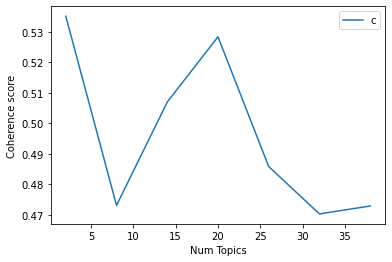

In [76]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

From the plot it clear that at topic 20 we are getting highest coherence.

In [77]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5351
Num Topics = 8  has Coherence Value of 0.4731
Num Topics = 14  has Coherence Value of 0.507
Num Topics = 20  has Coherence Value of 0.5284
Num Topics = 26  has Coherence Value of 0.4858
Num Topics = 32  has Coherence Value of 0.4703
Num Topics = 38  has Coherence Value of 0.4729


In [78]:
# Select the model and print the topics : Num Topics = 20  has Coherence Value of 0.5284
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.011*"people" + 0.008*"write" + 0.006*"line" + 0.006*"article" + '
  '0.005*"say" + 0.005*"time" + 0.005*"know" + 0.004*"state" + '
  '0.004*"organization" + 0.004*"many"'),
 (1,
  '0.010*"right" + 0.008*"write" + 0.008*"state" + 0.007*"line" + '
  '0.007*"people" + 0.007*"get" + 0.006*"law" + 0.005*"government" + '
  '0.005*"article" + 0.005*"make"'),
 (2,
  '0.011*"file" + 0.011*"image" + 0.011*"line" + 0.010*"system" + '
  '0.009*"program" + 0.009*"software" + 0.009*"include" + 0.009*"available" + '
  '0.008*"use" + 0.007*"version"'),
 (3,
  '0.022*"write" + 0.019*"line" + 0.015*"article" + 0.012*"get" + '
  '0.011*"organization" + 0.011*"nntp_poste" + 0.010*"host" + 0.009*"know" + '
  '0.008*"go" + 0.007*"see"'),
 (4,
  '0.021*"say" + 0.016*"go" + 0.011*"know" + 0.009*"come" + 0.009*"people" + '
  '0.008*"get" + 0.008*"tell" + 0.007*"see" + 0.006*"take" + 0.005*"think"'),
 (5,
  '0.057*"drive" + 0.036*"scsi" + 0.020*"ide" + 0.012*"controller" + '
  '0.012*"chip" + 0.008*"b